In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
!pip install imutils

In [6]:
import numpy as np
#import pandas as pd
import tensorflow as tf
import cv2
#import os
from imutils import paths
path = list(paths.list_images("../input/cat-and-dog/training_set/training_set"))


In [7]:
path[1]

'../input/cat-and-dog/training_set/training_set/dogs/dog.1942.jpg'

In [8]:
len(path)

8005

In [22]:
path[1].split("/")

['..',
 'input',
 'cat-and-dog',
 'training_set',
 'training_set',
 'dogs',
 'dog.1942.jpg']

In [10]:
(cv2.imread(path[3])).shape

(387, 500, 3)

In [11]:
X_data = []
Y_labels = []

y_data = ['cats','dogs']

for i in range(0,len(path)):
    label = path[i].split("/")[-2]
    if label not in y_data:
        continue
    else:
        image = cv2.imread(path[i])#IMAGE WILL BE SAVED IN ARRAY FORMAT 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#CONVERT ING INTO RGB FORMAT
        image = cv2.resize(image, (124,124))#APPLY FIX SIZE TO ALL IMAGES 
        X_data.append(image)
        Y_labels.append(label)

In [12]:
x_array = np.array(X_data)
y_array = np.array(Y_labels)

In [13]:
x_array.shape,y_array.shape

((8005, 124, 124, 3), (8005,))

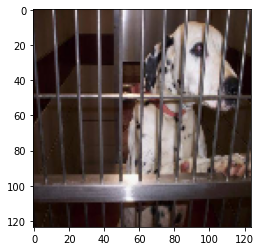

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_array[1000])

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
LE = LabelEncoder()
LE.fit(y_array)
Y_Encoded = LE.transform(y_array)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_array, Y_Encoded, test_size = 0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((6404, 124, 124, 3), (1601, 124, 124, 3), (6404,), (1601,))

In [17]:
x_train_norm = x_train/255.
x_test_norm = x_test/255.

**OPTIMIZER(ADAM WITH DEFAULT LEARNING RATE)**

In [30]:
model=tf.keras.Sequential()


model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(500, activation='relu'))

model.add(tf.keras.layers.Dense(200, activation='relu'))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(60, activation='relu'))

model.add(tf.keras.layers.Dense(30, activation='relu'))


#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [31]:

model.compile(optimizer='Adam', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

2022-01-03 17:38:06.042230: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1181614848 exceeds 10% of free system memory.


Epoch 1/7
201/201 [==============================] - 8s 35ms/step - loss: 0.7823 - accuracy: 0.5879 - val_loss: 0.6964 - val_accuracy: 0.4978
Epoch 2/7
201/201 [==============================] - 6s 32ms/step - loss: 0.6182 - accuracy: 0.6629 - val_loss: 0.7010 - val_accuracy: 0.5072
Epoch 3/7
201/201 [==============================] - 6s 32ms/step - loss: 0.4871 - accuracy: 0.7672 - val_loss: 0.6369 - val_accuracy: 0.6334
Epoch 4/7
201/201 [==============================] - 6s 31ms/step - loss: 0.2590 - accuracy: 0.8960 - val_loss: 0.7095 - val_accuracy: 0.6846
Epoch 5/7
201/201 [==============================] - 6s 32ms/step - loss: 0.1122 - accuracy: 0.9644 - val_loss: 1.0802 - val_accuracy: 0.7014
Epoch 6/7
201/201 [==============================] - 6s 32ms/step - loss: 0.0698 - accuracy: 0.9791 - val_loss: 1.5161 - val_accuracy: 0.6814
Epoch 7/7
201/201 [==============================] - 6s 31ms/step - loss: 0.0600 - accuracy: 0.9781 - val_loss: 1.7681 - val_accuracy: 0.6814


**OPTIMIZER(ADAM WITH DEFAULT LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.9781
* TESTING_ACCURACY:0.6814

**OPTIMIZER(SGD WITH DEFAULT LEARNING RATE)**

In [33]:
model_1=tf.keras.Sequential()

model_1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_1.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_1.add(tf.keras.layers.Flatten())

#Dense layer
model_1.add(tf.keras.layers.Dense(500, activation='relu'))
model_1.add(tf.keras.layers.Dense(200, activation='relu'))
model_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_1.add(tf.keras.layers.Dense(60, activation='relu'))
model_1.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [34]:
model_1.compile(optimizer='SGD', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
model_1.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

Epoch 1/7
201/201 [==============================] - 7s 30ms/step - loss: 0.6483 - accuracy: 0.6087 - val_loss: 0.6782 - val_accuracy: 0.5853
Epoch 2/7
201/201 [==============================] - 5s 27ms/step - loss: 0.5590 - accuracy: 0.7077 - val_loss: 0.6756 - val_accuracy: 0.5715
Epoch 3/7
201/201 [==============================] - 5s 26ms/step - loss: 0.4223 - accuracy: 0.8068 - val_loss: 1.1811 - val_accuracy: 0.5415
Epoch 4/7
201/201 [==============================] - 5s 27ms/step - loss: 0.2403 - accuracy: 0.9043 - val_loss: 0.6989 - val_accuracy: 0.6877
Epoch 5/7
201/201 [==============================] - 5s 27ms/step - loss: 0.0881 - accuracy: 0.9727 - val_loss: 0.9088 - val_accuracy: 0.6883
Epoch 6/7
201/201 [==============================] - 5s 27ms/step - loss: 0.0308 - accuracy: 0.9923 - val_loss: 1.1941 - val_accuracy: 0.6596
Epoch 7/7
201/201 [==============================] - 5s 26ms/step - loss: 0.0113 - accuracy: 0.9981 - val_loss: 1.2280 - val_accuracy: 0.7108


**OPTIMIZER(SGD WITH DEFAULT LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.9981
* TESTING_ACCURACY:0.7108

**OPTIMIZER(RMSprop WITH DEFAULT LEARNING RATE)**

In [36]:
model_2=tf.keras.Sequential()

model_2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_2.add(tf.keras.layers.BatchNormalization())
model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_2.add(tf.keras.layers.Flatten())

#Dense layer
model_2.add(tf.keras.layers.Dense(500, activation='relu'))
model_2.add(tf.keras.layers.Dense(200, activation='relu'))
model_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_2.add(tf.keras.layers.Dense(60, activation='relu'))
model_2.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [37]:
model_2.compile(optimizer='RMSprop', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model_2.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

Epoch 1/7
201/201 [==============================] - 10s 47ms/step - loss: 0.8607 - accuracy: 0.5617 - val_loss: 0.6972 - val_accuracy: 0.5122
Epoch 2/7
201/201 [==============================] - 9s 42ms/step - loss: 0.6629 - accuracy: 0.6323 - val_loss: 0.6725 - val_accuracy: 0.5746
Epoch 3/7
201/201 [==============================] - 8s 42ms/step - loss: 0.5491 - accuracy: 0.7281 - val_loss: 0.5910 - val_accuracy: 0.6871
Epoch 4/7
201/201 [==============================] - 9s 43ms/step - loss: 0.4084 - accuracy: 0.8220 - val_loss: 2.2402 - val_accuracy: 0.5303
Epoch 5/7
201/201 [==============================] - 9s 43ms/step - loss: 0.2323 - accuracy: 0.9169 - val_loss: 1.6935 - val_accuracy: 0.6852
Epoch 6/7
201/201 [==============================] - 9s 42ms/step - loss: 0.1304 - accuracy: 0.9585 - val_loss: 4.4190 - val_accuracy: 0.6665
Epoch 7/7
201/201 [==============================] - 9s 42ms/step - loss: 0.0881 - accuracy: 0.9764 - val_loss: 3.9872 - val_accuracy: 0.6889


**OPTIMIZER(RMSprop WITH DEFAULT LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.9764
* TESTING_ACCURACY:0.6889

**OPTIMIZER(Adadelta WITH DEFAULT LEARNING RATE)**

In [19]:
model_3=tf.keras.Sequential()

model_3.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_3.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_3.add(tf.keras.layers.BatchNormalization())
model_3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_3.add(tf.keras.layers.Flatten())

#Dense layer
model_3.add(tf.keras.layers.Dense(500, activation='relu'))
model_3.add(tf.keras.layers.Dense(200, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(60, activation='relu'))
model_3.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

2022-01-03 16:59:21.321994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 16:59:21.406829: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 16:59:21.407571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 16:59:21.408861: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
model_3.compile(optimizer='Adadelta', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model_3.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

2022-01-03 16:59:24.620487: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1181614848 exceeds 10% of free system memory.
2022-01-03 16:59:25.881479: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1181614848 exceeds 10% of free system memory.
2022-01-03 16:59:26.722243: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7


2022-01-03 16:59:28.116679: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


201/201 [==============================] - 15s 39ms/step - loss: 0.6779 - accuracy: 0.5696 - val_loss: 0.6852 - val_accuracy: 0.5990
Epoch 2/7
201/201 [==============================] - 7s 35ms/step - loss: 0.6201 - accuracy: 0.6813 - val_loss: 0.6627 - val_accuracy: 0.6377
Epoch 3/7
201/201 [==============================] - 7s 35ms/step - loss: 0.5726 - accuracy: 0.7242 - val_loss: 0.6372 - val_accuracy: 0.6352
Epoch 4/7
201/201 [==============================] - 7s 35ms/step - loss: 0.5332 - accuracy: 0.7725 - val_loss: 0.6168 - val_accuracy: 0.6477
Epoch 5/7
201/201 [==============================] - 7s 35ms/step - loss: 0.4959 - accuracy: 0.8040 - val_loss: 0.6144 - val_accuracy: 0.6446
Epoch 6/7
201/201 [==============================] - 7s 35ms/step - loss: 0.4613 - accuracy: 0.8351 - val_loss: 0.6080 - val_accuracy: 0.6596
Epoch 7/7
201/201 [==============================] - 7s 35ms/step - loss: 0.4278 - accuracy: 0.8632 - val_loss: 0.6137 - val_accuracy: 0.6571


**OPTIMIZER(Adadelta WITH DEFAULT LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.8632
* TESTING_ACCURACY:0.6571

**OPTIMIZER(Adagrad WITH DEFAULT LEARNING RATE)**

In [22]:
model_4=tf.keras.Sequential()

model_4.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_4.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_4.add(tf.keras.layers.Flatten())

#Dense layer
model_4.add(tf.keras.layers.Dense(500, activation='relu'))
model_4.add(tf.keras.layers.Dense(200, activation='relu'))
model_4.add(tf.keras.layers.Dense(100, activation='relu'))
model_4.add(tf.keras.layers.Dense(60, activation='relu'))
model_4.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_4.add(tf.keras.layers.Dense(1, activation='sigmoid'))



model_4.compile(optimizer='Adagrad', 
              loss='binary_crossentropy', metrics=['accuracy'])

model_4.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

2022-01-03 17:03:54.797931: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1181614848 exceeds 10% of free system memory.
2022-01-03 17:03:56.005950: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1181614848 exceeds 10% of free system memory.


Epoch 1/7
201/201 [==============================] - 8s 34ms/step - loss: 0.6567 - accuracy: 0.6032 - val_loss: 0.6731 - val_accuracy: 0.6127
Epoch 2/7
201/201 [==============================] - 6s 30ms/step - loss: 0.5435 - accuracy: 0.7222 - val_loss: 0.6679 - val_accuracy: 0.5921
Epoch 3/7
201/201 [==============================] - 6s 30ms/step - loss: 0.4277 - accuracy: 0.8165 - val_loss: 0.6866 - val_accuracy: 0.5828
Epoch 4/7
201/201 [==============================] - 6s 31ms/step - loss: 0.2928 - accuracy: 0.8958 - val_loss: 0.7424 - val_accuracy: 0.6215
Epoch 5/7
201/201 [==============================] - 6s 30ms/step - loss: 0.1835 - accuracy: 0.9507 - val_loss: 0.7853 - val_accuracy: 0.6752
Epoch 6/7
201/201 [==============================] - 6s 30ms/step - loss: 0.0999 - accuracy: 0.9813 - val_loss: 0.7534 - val_accuracy: 0.6746
Epoch 7/7
201/201 [==============================] - 6s 31ms/step - loss: 0.0524 - accuracy: 0.9939 - val_loss: 1.1391 - val_accuracy: 0.6477


**OPTIMIZER(Adagrad WITH DEFAULT LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.9939
* TESTING_ACCURACY:0.6477

**OPTIMIZER(Adamax WITH DEFAULT LEARNING RATE)**

In [23]:
model_5=tf.keras.Sequential()

model_5.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_5.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_5.add(tf.keras.layers.BatchNormalization())
model_5.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_5.add(tf.keras.layers.Flatten())

#Dense layer
model_5.add(tf.keras.layers.Dense(500, activation='relu'))
model_5.add(tf.keras.layers.Dense(200, activation='relu'))
model_5.add(tf.keras.layers.Dense(100, activation='relu'))
model_5.add(tf.keras.layers.Dense(60, activation='relu'))
model_5.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_5.add(tf.keras.layers.Dense(1, activation='sigmoid'))



model_5.compile(optimizer='Adamax', 
              loss='binary_crossentropy', metrics=['accuracy'])

model_5.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

2022-01-03 17:06:03.317756: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1181614848 exceeds 10% of free system memory.


Epoch 1/7
201/201 [==============================] - 8s 37ms/step - loss: 0.7140 - accuracy: 0.6120 - val_loss: 0.6808 - val_accuracy: 0.5634
Epoch 2/7
201/201 [==============================] - 7s 33ms/step - loss: 0.4653 - accuracy: 0.7831 - val_loss: 0.6292 - val_accuracy: 0.6352
Epoch 3/7
201/201 [==============================] - 7s 33ms/step - loss: 0.2114 - accuracy: 0.9199 - val_loss: 0.6713 - val_accuracy: 0.6690
Epoch 4/7
201/201 [==============================] - 7s 33ms/step - loss: 0.0582 - accuracy: 0.9836 - val_loss: 0.9379 - val_accuracy: 0.7021
Epoch 5/7
201/201 [==============================] - 7s 34ms/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 1.0416 - val_accuracy: 0.6802
Epoch 6/7
201/201 [==============================] - 7s 33ms/step - loss: 0.0229 - accuracy: 0.9933 - val_loss: 1.1998 - val_accuracy: 0.7252
Epoch 7/7
201/201 [==============================] - 7s 33ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 1.3043 - val_accuracy: 0.7189


**OPTIMIZER(Adamax WITH DEFAULT LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.9998
* TESTING_ACCURACY:0.7189

**OPTIMIZER(Nadam WITH DEFAULT LEARNING RATE)**

In [24]:
model_6=tf.keras.Sequential()

model_6.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_6.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_6.add(tf.keras.layers.BatchNormalization())
model_6.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_6.add(tf.keras.layers.Flatten())

#Dense layer
model_6.add(tf.keras.layers.Dense(500, activation='relu'))
model_6.add(tf.keras.layers.Dense(200, activation='relu'))
model_6.add(tf.keras.layers.Dense(100, activation='relu'))
model_6.add(tf.keras.layers.Dense(60, activation='relu'))
model_6.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_6.add(tf.keras.layers.Dense(1, activation='sigmoid'))



model_6.compile(optimizer='Nadam', 
              loss='binary_crossentropy', metrics=['accuracy'])

model_6.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)


Epoch 1/7
201/201 [==============================] - 14s 65ms/step - loss: 0.8132 - accuracy: 0.5781 - val_loss: 2.2962 - val_accuracy: 0.5122
Epoch 2/7
201/201 [==============================] - 13s 63ms/step - loss: 0.6382 - accuracy: 0.6649 - val_loss: 0.7527 - val_accuracy: 0.5628
Epoch 3/7
201/201 [==============================] - 12s 62ms/step - loss: 0.5243 - accuracy: 0.7642 - val_loss: 0.7169 - val_accuracy: 0.6533
Epoch 4/7
201/201 [==============================] - 12s 62ms/step - loss: 0.2563 - accuracy: 0.8908 - val_loss: 0.8601 - val_accuracy: 0.6939
Epoch 5/7
201/201 [==============================] - 12s 62ms/step - loss: 0.0978 - accuracy: 0.9647 - val_loss: 1.1509 - val_accuracy: 0.6971
Epoch 6/7
201/201 [==============================] - 12s 62ms/step - loss: 0.0385 - accuracy: 0.9847 - val_loss: 1.7064 - val_accuracy: 0.6521
Epoch 7/7
201/201 [==============================] - 12s 62ms/step - loss: 0.0427 - accuracy: 0.9858 - val_loss: 1.3108 - val_accuracy: 0.7071

**OPTIMIZER(Nadam WITH DEFAULT LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.9858
* TESTING_ACCURACY:0.7071

**OPTIMIZER(Adam WITH EXP LEARNING RATE)**

In [33]:
model_7=tf.keras.Sequential()

model_7.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_7.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_7.add(tf.keras.layers.BatchNormalization())
model_7.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_7.add(tf.keras.layers.Flatten())

#Dense layer
model_7.add(tf.keras.layers.Dense(500, activation='relu'))
model_7.add(tf.keras.layers.Dense(200, activation='relu'))
model_7.add(tf.keras.layers.Dense(100, activation='relu'))
model_7.add(tf.keras.layers.Dense(60, activation='relu'))
model_7.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_7.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#By default learning rate 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model_7.compile(optimizer=opt, 
              loss='binary_crossentropy', metrics=['accuracy'])

model_7.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)


Epoch 1/7
201/201 [==============================] - 8s 36ms/step - loss: 0.8105 - accuracy: 0.6012 - val_loss: 0.7178 - val_accuracy: 0.4884
Epoch 2/7
201/201 [==============================] - 6s 32ms/step - loss: 0.5939 - accuracy: 0.6889 - val_loss: 0.8013 - val_accuracy: 0.5147
Epoch 3/7
201/201 [==============================] - 6s 31ms/step - loss: 0.4092 - accuracy: 0.8181 - val_loss: 0.6398 - val_accuracy: 0.7052
Epoch 4/7
201/201 [==============================] - 6s 32ms/step - loss: 0.1725 - accuracy: 0.9332 - val_loss: 0.9345 - val_accuracy: 0.6765
Epoch 5/7
201/201 [==============================] - 6s 31ms/step - loss: 0.0775 - accuracy: 0.9725 - val_loss: 1.1726 - val_accuracy: 0.7114
Epoch 6/7
201/201 [==============================] - 6s 32ms/step - loss: 0.0468 - accuracy: 0.9849 - val_loss: 1.4993 - val_accuracy: 0.6852
Epoch 7/7
201/201 [==============================] - 6s 32ms/step - loss: 0.0509 - accuracy: 0.9849 - val_loss: 1.2180 - val_accuracy: 0.6971


**OPTIMIZER(ADAM WITH EXP LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.9849
* TESTING_ACCURACY:0.6971

**OPTIMIZER(SGD WITH EXP LEARNING RATE)**

In [34]:
model_8=tf.keras.Sequential()

model_8.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_8.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_8.add(tf.keras.layers.BatchNormalization())
model_8.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_8.add(tf.keras.layers.Flatten())

#Dense layer
model_8.add(tf.keras.layers.Dense(500, activation='relu'))
model_8.add(tf.keras.layers.Dense(200, activation='relu'))
model_8.add(tf.keras.layers.Dense(100, activation='relu'))
model_8.add(tf.keras.layers.Dense(60, activation='relu'))
model_8.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_8.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#by default learning rate 0.01
opt =tf.keras.optimizers.SGD(learning_rate=0.001)


model_8.compile(optimizer=opt, 
              loss='binary_crossentropy', metrics=['accuracy'])

model_8.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

Epoch 1/7
201/201 [==============================] - 7s 31ms/step - loss: 0.6734 - accuracy: 0.5789 - val_loss: 0.6838 - val_accuracy: 0.5734
Epoch 2/7
201/201 [==============================] - 5s 26ms/step - loss: 0.5902 - accuracy: 0.6844 - val_loss: 0.6636 - val_accuracy: 0.6046
Epoch 3/7
201/201 [==============================] - 5s 27ms/step - loss: 0.5208 - accuracy: 0.7506 - val_loss: 0.6373 - val_accuracy: 0.6440
Epoch 4/7
201/201 [==============================] - 5s 27ms/step - loss: 0.4422 - accuracy: 0.8195 - val_loss: 0.6478 - val_accuracy: 0.6321
Epoch 5/7
201/201 [==============================] - 5s 27ms/step - loss: 0.3560 - accuracy: 0.8760 - val_loss: 0.9205 - val_accuracy: 0.5965
Epoch 6/7
201/201 [==============================] - 5s 27ms/step - loss: 0.2756 - accuracy: 0.9218 - val_loss: 0.9057 - val_accuracy: 0.6384
Epoch 7/7
201/201 [==============================] - 5s 27ms/step - loss: 0.2029 - accuracy: 0.9513 - val_loss: 0.7001 - val_accuracy: 0.6921


**OPTIMIZER(SGD WITH EXP LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.9513
* TESTING_ACCURACY:0.6921

**OPTIMIZER(RMSprop WITH EXP LEARNING RATE)**

In [35]:
model_9=tf.keras.Sequential()

model_9.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_9.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_9.add(tf.keras.layers.BatchNormalization())
model_9.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_9.add(tf.keras.layers.Flatten())

#Dense layer
model_9.add(tf.keras.layers.Dense(500, activation='relu'))
model_9.add(tf.keras.layers.Dense(200, activation='relu'))
model_9.add(tf.keras.layers.Dense(100, activation='relu'))
model_9.add(tf.keras.layers.Dense(60, activation='relu'))
model_9.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_9.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#by default learning rate 0.001


opt =tf.keras.optimizers.RMSprop(learning_rate=0.01)


model_9.compile(optimizer=opt, 
              loss='binary_crossentropy', metrics=['accuracy'])

model_9.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

Epoch 1/7
201/201 [==============================] - 10s 46ms/step - loss: 26.4376 - accuracy: 0.5151 - val_loss: 0.6946 - val_accuracy: 0.4878
Epoch 2/7
201/201 [==============================] - 9s 42ms/step - loss: 0.6937 - accuracy: 0.4992 - val_loss: 0.6947 - val_accuracy: 0.4878
Epoch 3/7
201/201 [==============================] - 9s 43ms/step - loss: 0.6934 - accuracy: 0.5045 - val_loss: 0.6938 - val_accuracy: 0.4878
Epoch 4/7
201/201 [==============================] - 9s 42ms/step - loss: 0.6935 - accuracy: 0.5027 - val_loss: 0.6933 - val_accuracy: 0.4878
Epoch 5/7
201/201 [==============================] - 8s 42ms/step - loss: 0.6937 - accuracy: 0.4839 - val_loss: 0.6932 - val_accuracy: 0.4878
Epoch 6/7
201/201 [==============================] - 8s 42ms/step - loss: 0.6935 - accuracy: 0.4948 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 7/7
201/201 [==============================] - 9s 43ms/step - loss: 0.6935 - accuracy: 0.5030 - val_loss: 0.6929 - val_accuracy: 0.5122


**OPTIMIZER(RMSprop WITH DEFAULT EXP RATE) ACCURACY**
* TRAINING_ACCURACY:0.5030
* TESTING_ACCURACY:0.5122

**OPTIMIZER(Adadelta WITH EXP LEARNING RATE)**

In [22]:
model_10=tf.keras.Sequential()

model_10.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_10.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_10.add(tf.keras.layers.BatchNormalization())
model_10.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_10.add(tf.keras.layers.Flatten())

#Dense layer
model_10.add(tf.keras.layers.Dense(500, activation='relu'))
model_10.add(tf.keras.layers.Dense(200, activation='relu'))
model_10.add(tf.keras.layers.Dense(100, activation='relu'))
model_10.add(tf.keras.layers.Dense(60, activation='relu'))
model_10.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_10.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#by default learning rate 0.001

opt =tf.keras.optimizers.Adadelta(learning_rate=0.01)



model_10.compile(optimizer=opt, 
              loss='binary_crossentropy', metrics=['accuracy'])

model_10.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

Epoch 1/7
201/201 [==============================] - 9s 39ms/step - loss: 0.6500 - accuracy: 0.6138 - val_loss: 0.6834 - val_accuracy: 0.5409
Epoch 2/7
201/201 [==============================] - 7s 35ms/step - loss: 0.5654 - accuracy: 0.7060 - val_loss: 0.6739 - val_accuracy: 0.5771
Epoch 3/7
201/201 [==============================] - 7s 35ms/step - loss: 0.4731 - accuracy: 0.7811 - val_loss: 0.6144 - val_accuracy: 0.6583
Epoch 4/7
201/201 [==============================] - 7s 35ms/step - loss: 0.3647 - accuracy: 0.8559 - val_loss: 0.7218 - val_accuracy: 0.6240
Epoch 5/7
201/201 [==============================] - 7s 35ms/step - loss: 0.2641 - accuracy: 0.9141 - val_loss: 0.6693 - val_accuracy: 0.6665
Epoch 6/7
201/201 [==============================] - 7s 35ms/step - loss: 0.1858 - accuracy: 0.9516 - val_loss: 0.7120 - val_accuracy: 0.6771
Epoch 7/7
201/201 [==============================] - 7s 35ms/step - loss: 0.1209 - accuracy: 0.9789 - val_loss: 0.7314 - val_accuracy: 0.6939


**OPTIMIZER(Adadelta WITH EXP LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.9789
* TESTING_ACCURACY:0.6939

**OPTIMIZER(Adagrad WITH EXP LEARNING RATE)**

In [23]:
model_11=tf.keras.Sequential()

model_11.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_11.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_11.add(tf.keras.layers.BatchNormalization())
model_11.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_11.add(tf.keras.layers.Flatten())

#Dense layer
model_11.add(tf.keras.layers.Dense(500, activation='relu'))
model_11.add(tf.keras.layers.Dense(200, activation='relu'))
model_11.add(tf.keras.layers.Dense(100, activation='relu'))
model_11.add(tf.keras.layers.Dense(60, activation='relu'))
model_11.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_11.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#by default learning rate 0.001

opt =tf.keras.optimizers.Adagrad(learning_rate=0.01)



model_11.compile(optimizer=opt, 
              loss='binary_crossentropy', metrics=['accuracy'])

model_11.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

Epoch 1/7
201/201 [==============================] - 7s 34ms/step - loss: 0.6617 - accuracy: 0.6006 - val_loss: 0.6845 - val_accuracy: 0.5372
Epoch 2/7
201/201 [==============================] - 6s 30ms/step - loss: 0.5656 - accuracy: 0.7025 - val_loss: 0.6949 - val_accuracy: 0.5103
Epoch 3/7
201/201 [==============================] - 6s 31ms/step - loss: 0.4269 - accuracy: 0.7993 - val_loss: 0.7136 - val_accuracy: 0.6259
Epoch 4/7
201/201 [==============================] - 6s 30ms/step - loss: 0.2292 - accuracy: 0.9072 - val_loss: 0.7949 - val_accuracy: 0.6702
Epoch 5/7
201/201 [==============================] - 6s 30ms/step - loss: 0.0809 - accuracy: 0.9717 - val_loss: 4.9732 - val_accuracy: 0.5122
Epoch 6/7
201/201 [==============================] - 6s 30ms/step - loss: 0.1144 - accuracy: 0.9600 - val_loss: 0.9745 - val_accuracy: 0.7127
Epoch 7/7
201/201 [==============================] - 6s 30ms/step - loss: 0.0211 - accuracy: 0.9941 - val_loss: 1.2184 - val_accuracy: 0.7139


**OPTIMIZER(Adagrad WITH EXP LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.9941
* TESTING_ACCURACY:0.7139

**OPTIMIZER(Adamax WITH EXP LEARNING RATE)**

In [24]:
model_12=tf.keras.Sequential()

model_12.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_12.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_12.add(tf.keras.layers.BatchNormalization())
model_12.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_12.add(tf.keras.layers.Flatten())

#Dense layer
model_12.add(tf.keras.layers.Dense(500, activation='relu'))
model_12.add(tf.keras.layers.Dense(200, activation='relu'))
model_12.add(tf.keras.layers.Dense(100, activation='relu'))
model_12.add(tf.keras.layers.Dense(60, activation='relu'))
model_12.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_12.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#by default learning rate 0.001

opt =tf.keras.optimizers.Adamax(learning_rate=0.01)


model_12.compile(optimizer=opt, 
              loss='binary_crossentropy', metrics=['accuracy'])

model_12.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

Epoch 1/7
201/201 [==============================] - 8s 37ms/step - loss: 5.0766 - accuracy: 0.5686 - val_loss: 0.6797 - val_accuracy: 0.5597
Epoch 2/7
201/201 [==============================] - 7s 34ms/step - loss: 0.6280 - accuracy: 0.6680 - val_loss: 0.6797 - val_accuracy: 0.5871
Epoch 3/7
201/201 [==============================] - 7s 33ms/step - loss: 0.5752 - accuracy: 0.6969 - val_loss: 0.7940 - val_accuracy: 0.5665
Epoch 4/7
201/201 [==============================] - 7s 33ms/step - loss: 0.5176 - accuracy: 0.7427 - val_loss: 0.6226 - val_accuracy: 0.6665
Epoch 5/7
201/201 [==============================] - 7s 33ms/step - loss: 0.4529 - accuracy: 0.7837 - val_loss: 0.6458 - val_accuracy: 0.6783
Epoch 6/7
201/201 [==============================] - 7s 33ms/step - loss: 0.3624 - accuracy: 0.8384 - val_loss: 0.8326 - val_accuracy: 0.6515
Epoch 7/7
201/201 [==============================] - 7s 34ms/step - loss: 0.2652 - accuracy: 0.8874 - val_loss: 1.0491 - val_accuracy: 0.6290


**OPTIMIZER(Adamax WITH EXP LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.8874
* TESTING_ACCURACY:0.6290

**OPTIMIZER(Nadam WITH EXP LEARNING RATE)**

In [18]:
model_13=tf.keras.Sequential()

model_13.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(124,124,3),activation='relu'))
model_13.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_13.add(tf.keras.layers.BatchNormalization())
model_13.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model_13.add(tf.keras.layers.Flatten())

#Dense layer
model_13.add(tf.keras.layers.Dense(500, activation='relu'))
model_13.add(tf.keras.layers.Dense(200, activation='relu'))
model_13.add(tf.keras.layers.Dense(100, activation='relu'))
model_13.add(tf.keras.layers.Dense(60, activation='relu'))
model_13.add(tf.keras.layers.Dense(30, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model_13.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#by default learning rate 0.001

opt =tf.keras.optimizers.Nadam(learning_rate=0.01)


model_13.compile(optimizer=opt, 
              loss='binary_crossentropy', metrics=['accuracy'])

model_13.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=7)

2022-01-03 18:07:38.537884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 18:07:38.616936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 18:07:38.617614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 18:07:38.618977: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/7


2022-01-03 18:07:46.336428: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


201/201 [==============================] - 21s 66ms/step - loss: 4.5542 - accuracy: 0.5317 - val_loss: 0.6930 - val_accuracy: 0.5122
Epoch 2/7
201/201 [==============================] - 12s 62ms/step - loss: 0.6935 - accuracy: 0.4902 - val_loss: 0.6934 - val_accuracy: 0.4878
Epoch 3/7
201/201 [==============================] - 13s 63ms/step - loss: 0.6935 - accuracy: 0.5037 - val_loss: 0.6946 - val_accuracy: 0.4878
Epoch 4/7
201/201 [==============================] - 13s 62ms/step - loss: 0.6959 - accuracy: 0.4933 - val_loss: 0.6938 - val_accuracy: 0.4878
Epoch 5/7
201/201 [==============================] - 13s 64ms/step - loss: 0.6973 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 6/7
201/201 [==============================] - 13s 63ms/step - loss: 0.6934 - accuracy: 0.4928 - val_loss: 0.6929 - val_accuracy: 0.5122
Epoch 7/7
201/201 [==============================] - 13s 64ms/step - loss: 0.6935 - accuracy: 0.4884 - val_loss: 0.6932 - val_accuracy: 0.4897


**OPTIMIZER(Nadam WITH EXP LEARNING RATE) ACCURACY**
* TRAINING_ACCURACY:0.4884
* TESTING_ACCURACY:0.4897

In [19]:
df1 = pd.DataFrame()
df1['Names'] = ['SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam']

df1['TRAING_ACC_DEF_LR'] =[0.9981,0.9764,0.9781,0.8632,0.9939,0.9998,0.9858]
df1['TESTING_ACC_DEF_LR']=[0.7108,0.6889,0.6814,0.6571,0.6477,0.7189,0.7071]
df1['TRAINING_ACC_EXP_LR']=[0.9513,0.5030,0.9849,0.9789,0.9941,0.8874,0.4884]
df1['TESTING_ACC_EXP_LR']=[0.6921,0.5122,0.6971,0.6939,0.7139,0.6290,0.4897]
df1

,Names,TRAING_ACC_DEF_LR,TESTING_ACC_DEF_LR,TRAINING_ACC_EXP_LR,TESTING_ACC_EXP_LR
0,SGD,0.9981,0.7108,0.9513,0.6921
1,RMSprop,0.9764,0.6889,0.5030,0.5122
2,Adam,0.9781,0.6814,0.9849,0.6971
3,Adadelta,0.8632,0.6571,0.9789,0.6939
4,Adagrad,0.9939,0.6477,0.9941,0.7139
5,Adamax,0.9998,0.7189,0.8874,0.6290
6,Nadam,0.9858,0.7071,0.4884,0.4897


In [21]:
import seaborn as sns
sns.set_theme()
CM =sns.color_palette("light:b", as_cmap=True)
df1.style.background_gradient(cmap=CM)

,Names,TRAING_ACC_DEF_LR,TESTING_ACC_DEF_LR,TRAINING_ACC_EXP_LR,TESTING_ACC_EXP_LR
0,SGD,0.998100,0.710800,0.951300,0.692100
1,RMSprop,0.976400,0.688900,0.503000,0.512200
2,Adam,0.978100,0.681400,0.984900,0.697100
3,Adadelta,0.863200,0.657100,0.978900,0.693900
4,Adagrad,0.993900,0.647700,0.994100,0.713900
5,Adamax,0.999800,0.718900,0.887400,0.629000
6,Nadam,0.985800,0.707100,0.488400,0.489700
